¡Hola,Edgar!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto: 

<div class="alert alert-block alert-info">
<b>Comentario del alumno</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Edgar! Has hecho un excelente trabajo con los ajustes, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis.

Sigue con el excelente trabajo!
</div>

# Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## Inicialización

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from math import factorial
from scipy import stats as st

## Paso 1. Abre el archivo de datos y estudia la información general 

Ruta de archivo: /datasets/games.csv

In [3]:
games = pd.read_csv('/datasets/games.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias. 

## Paso 2. Prepara los datos

In [4]:
games.info()
games.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
# Reemplaza los nombres de las columnas (ponlos en minúsculas)
new_columns = {'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'}
games.rename(columns = new_columns, inplace = True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Procesa los valores ausentes, analiza si rellena y con qué rellena o dejar en blanco.

In [6]:
# Conteo de valores ausentes
print(games[games['critic_score'] == 'tbd'])
print()
print(games[games['user_score'] == 'tbd'])
print()
print(games[games['rating'] == 'tbd'])
print()
print(games.isna().sum())

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

                                           name platform  year_of_release  \
119                               Zumba Fitness      Wii           2010.0   
301              Namco Museum: 50th Anniversary      PS2           2005.0   
520                             Zumba Fitness 2      Wii           2011.0   
645                                uDraw Studio      Wii           2010.0   
657    Frogger's Adventures: Temple of the Frog      GBA              NaN   
...                                         ...      ...              ...   
16695                           Planet Monsters      GBA           2001.0   
16697                          Bust-A-Move 3000       GC           2003.0   
16698                          Mega Brain Boost       DS           2008.0   
16704                                  Plushees       DS           2008.0   

In [7]:
games['year_of_release'] = games['year_of_release'].fillna(0)
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['rating'] = games['rating'].fillna('Missing')
games.dropna(subset = ['name'], inplace = True)
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

**¿Por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco? La abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.**

**Respuesta:** A la columna de 'year_of_release' la rellené con 0 para poder posteriormente poder convertirla en tipo 'int' y porque no puedo rellenar con media ni mediana dado que el año de lanzamiento de un juego no puede determinarse ni estimarse con estas medidas de dispersión.

En la columna 'critic_score' no rellené ni dejé en blanco, la dejé tal cual como NaN porque no puedo sustituír con media ni mediana, esto podría generarme un sesgo en mis datos, además si los dejara en blanco los convertiría en formato object lo cual tampoco es conveniente dado que la columna debe ser tipo 'float'. 

Finalmente para 'user_score' convertí los strings 'tbd' a NaN, de modo que posteriormente pueda convertir esta columna de tipo 'object' a 'float' (y realmente no me suma nada a mi análisis el dejarlos como tbd, al contrario porque no podría manejar mi columna como tipo 'float').

Adicionalmente, también se eliminaron las filas sin dato en la columna 'name' (nombre), las cuales se puede inferir que tampoco tenían dato en la columna 'genre' (genero) dado que .info() tampoco arrojó valores ausentes después de su eliminación. El motivo de eliminar estas filas es que sin nombre, ni género no se sabe a qué videojuego ni género pertenecen, por lo que no aportan valor al análisis.

**¿Por qué crees que los valores están ausentes?**

**Respuesta:** Quizás son juegos más viejos o menos conocidos que no generaron la necesidad de ser reseñados o puntuados por el usuario.


In [8]:
# Convierte los datos en los tipos necesarios
games['year_of_release'] = games['year_of_release'].astype('int')
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.**

**Respuesta:** La columna 'year_of_release' se convirtió a tipo 'int' dado que un año de lanzamiento no puede ser decimal y la columna 'user_score' se convirtió a tipo 'float' porque que la puntuación de usuario si puede se decimal.

In [9]:
# Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Missing,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Missing,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Missing,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Missing,28.31


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 



## Paso 3. Analiza los datos


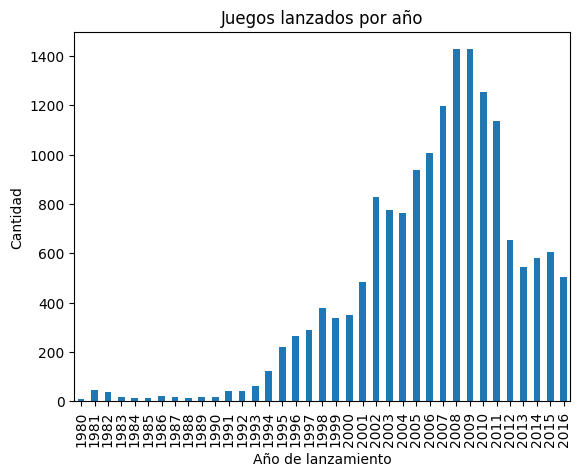

In [10]:
# Determina cuántos juegos fueron lanzados en diferentes años.
games_by_year = games[games['year_of_release'] != 0]
games_by_year = games_by_year.groupby(by='year_of_release')['year_of_release'].count()
games_by_year.plot(kind = 'bar', xlabel='Año de lanzamiento', ylabel='Cantidad')
plt.title('Juegos lanzados por año')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo, esta gráfica nos ayuda a entender el comportamiento del mercado de videojuegos en el tiempo




¿Son significativos los datos de cada período?

**Respuesta:** Puede observarse al menos 5 periódos, el primero de 1980 a 1993, el segundo de 1994 a 2001, el tercero de 2002 a 2006, el cuarto de 2007 a 2011 y el quinto de 2012 a 2016. En todos los periodos observamos un incremento en la cantidad de juegos lanzados con respecto al periódo anterior excepto en el quinto, donde se observa un descenso. Sin embargo requeriremos calcular las ventas por cada plataforma para poder realizar una comparativa directa.

In [11]:
# Calcula las ventas de cada plataforma.
sales_by_platform = games.groupby(by='platform')['total_sales'].sum()
print(sales_by_platform)

platform
2600      96.98
3DO        0.10
3DS      259.00
DC        15.95
DS       806.12
GB       255.46
GBA      317.85
GC       198.93
GEN       28.35
GG         0.04
N64      218.68
NES      251.05
NG         1.44
PC       259.52
PCFX       0.03
PS       730.86
PS2     1255.77
PS3      939.65
PS4      314.14
PSP      294.05
PSV       54.07
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      907.51
WiiU      82.19
X360     971.42
XB       257.74
XOne     159.32
Name: total_sales, dtype: float64


**Observando el resultado anterior, ¿Cómo varían las ventas de una plataforma a otra?**

**Respuesta:** Se oberva  bastante variación entre las plataformas, sería buena idea ordenarlas y observar su variación por método de otras herramientas más adecuadas.

In [12]:
# Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año.
top_platforms_sales = sales_by_platform.sort_values(ascending = False)

In [13]:
top_platforms_sales.head(6)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
Name: total_sales, dtype: float64

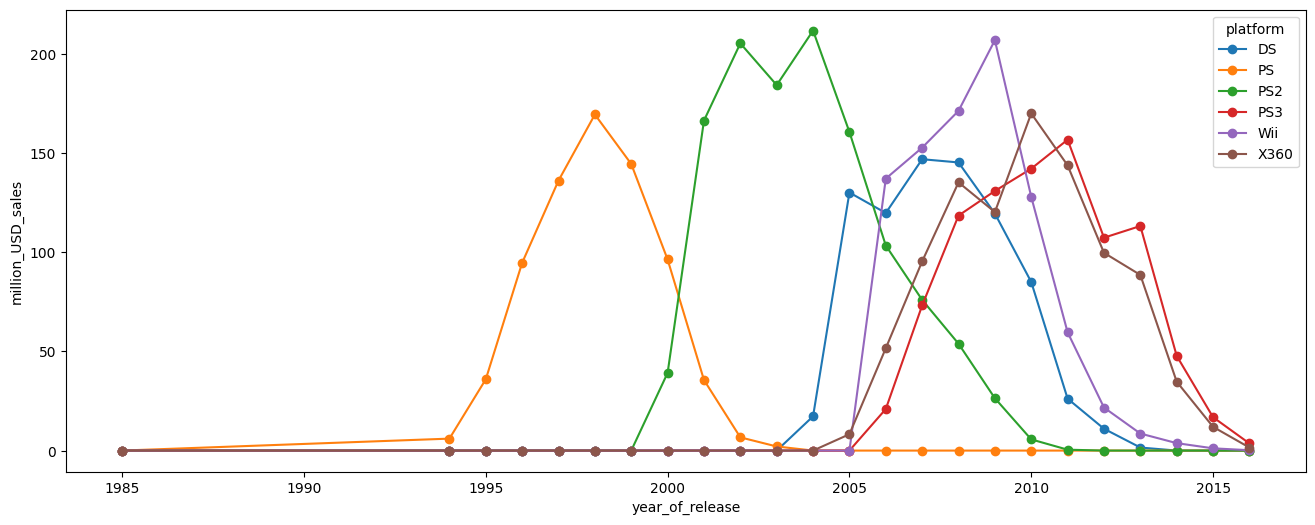

In [14]:
platforms_to_filter = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
games_top_platforms = games[games['platform'].isin(platforms_to_filter)].copy()
games_top_platforms = games_top_platforms[games_top_platforms['year_of_release'] != 0].copy()
games_top_platforms_pivot_table = games_top_platforms.pivot_table(values='total_sales', index='year_of_release', columns='platform', aggfunc='sum', fill_value=0)
games_top_platforms_pivot_table.plot(kind='line', figsize=(16, 6), marker='o', ylabel='million_USD_sales')
plt.show()

In [15]:
games_top_platforms.groupby(['platform', 'year_of_release'])['platform'].count().head(33)

platform  year_of_release
DS        1985                 1
          2004                23
          2005               118
          2006               201
          2007               376
          2008               492
          2009               403
          2010               323
          2011               153
          2012                23
          2013                 8
PS        1994                17
          1995                99
          1996               164
          1997               188
          1998               248
          1999               200
          2000               160
          2001                91
          2002                20
          2003                 3
PS2       2000                82
          2001               185
          2002               280
          2003               256
          2004               259
          2005               260
          2006               259
          2007               214
          2008   

In [16]:
games_top_platforms.groupby(['platform', 'year_of_release'])['platform'].count().tail(34)

platform  year_of_release
PS3       2006                27
          2007                90
          2008               138
          2009               162
          2010               181
          2011               215
          2012               148
          2013               126
          2014               108
          2015                73
          2016                38
Wii       2006                44
          2007               185
          2008               282
          2009               325
          2010               253
          2011               143
          2012                31
          2013                12
          2014                 6
          2015                 4
          2016                 1
X360      2005                18
          2006                93
          2007               123
          2008               146
          2009               172
          2010               182
          2011               206
          2012   

**Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?**

**Respuesta:** Observando la gráfica anterior y las tablas filtradas, podemos decir que las plataformas tienen un patrón en el cual tienen su lanzamiento, un aumento hasta llegar a pico en ventas y finalmente su descenso. Podemos determinar cuánto tardan en salir las nuevas plataformas al menos para las plataformas PS, PS2 y PS3 (que son de la misma franquicia), las cuales han salido cada 6 años aproximadamente y han tardado en promedio 10 años en desaparecer. Podemos observar también que el pico en ventas coincide con la mitad del ciclo de vida de las plataformas, (p.ej. para las franquicia PS sus picos de  venta se encuentran apropximadamente a los 5 años).

**Determina para qué período debes tomar datos. Los datos deberían permitirte construir un modelo para 2017. Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.**


In [17]:
# ¿Qué plataformas son líderes en ventas?
top_platforms_sales.head(10)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

**Respuesta:** Como hemos visto, PS2, X360, PS3, Wii, DS y PS han sido las plataformas que más millones han recaudado, sin embargo varias de estas plataformas ya han dejado de producir ganancias.

**¿Cuáles plataformas crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.**

**Respuesta:** Todas las plataformas muestran el mismo comportamiento de ascenso y descenso. Dado este comportamiento, las plataformas que aun podrían ser rentables en 2017 son PS3 y X360, dado que las demás plataformas ya han pasado por su ciclo y no son más tendencia, apostando por los videojuegos que tengan las mejores reseñas / puntuaciones.

Por otro lado es buena idea voltear a ver a las nuevas plataformas que se encuentren en desarrollo.

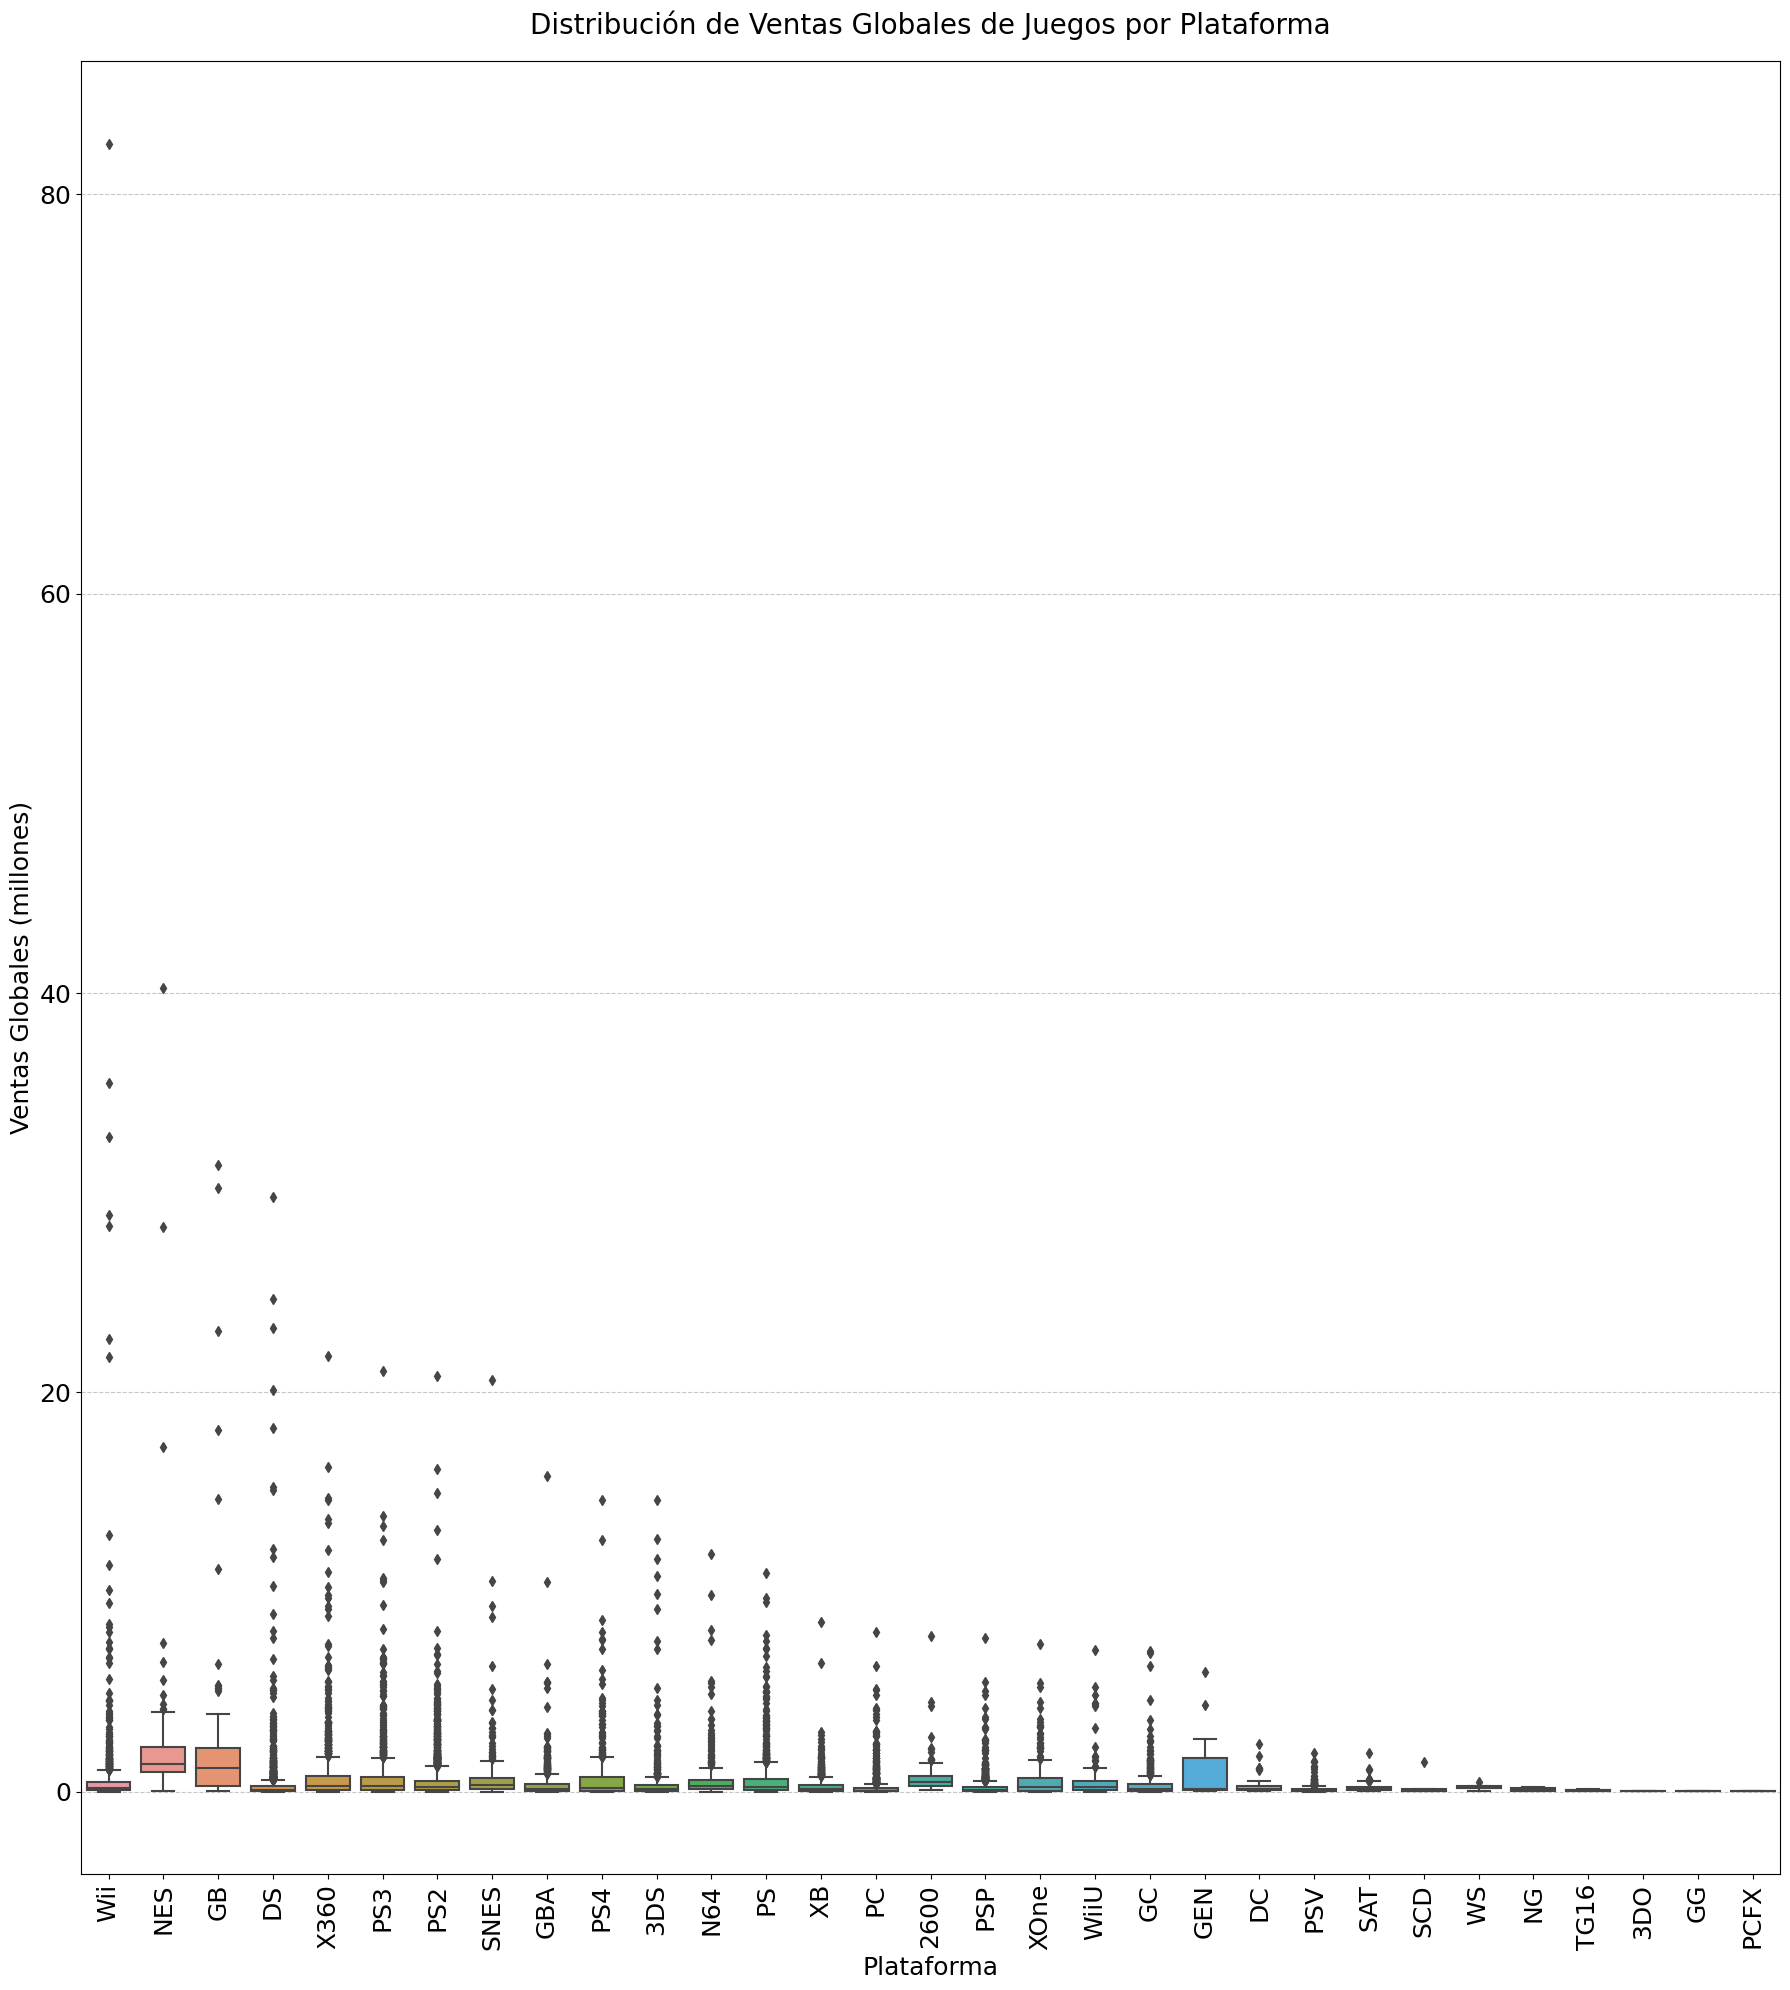

In [18]:
# Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.
sales_boxplot = games[games['year_of_release'] != 0]
plt.figure(figsize=(18, 20))
sns.boxplot(data=sales_boxplot, x='platform', y='total_sales')
plt.title('Distribución de Ventas Globales de Juegos por Plataforma', fontsize=20, pad=20)
plt.xlabel('Plataforma', fontsize=18)
plt.ylabel('Ventas Globales (millones)', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

¿Son significativas las diferencias en las ventas?

**Respuesta:** Con este diagrama podemos observar para la mayoría de las plataformas hay datos por encima (y algunos bastante) de la media, estos vienen siendo los juegos más vendidos (best sellers).

¿Qué sucede con las ventas promedio en varias plataformas?

**Respuesta:** Las ventas promedio se observan bajas y con alta variación, esto es esperado dado que el patron de ventas de los videojuegos no sigue una distribución normal, sino que está basado en otros factores que no se ajustan a este tipo de distribución.

#### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección).

In [19]:
# Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas.
games_release_clean = games[games['year_of_release'] != 0]
selected_platforms = ['PS3', 'X360']
sales_vs_scores = games_release_clean[games_release_clean['platform'].isin(selected_platforms)]

Coeficiente de correlación: 0.40544786638401825


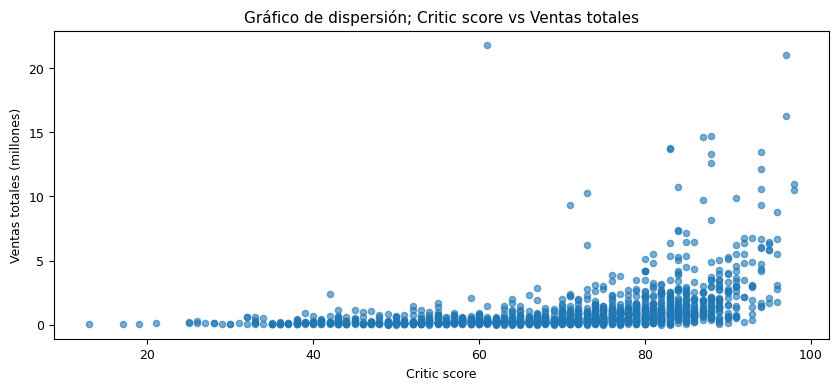

In [20]:
sales_vs_critic_score = sales_vs_scores.dropna(subset=['critic_score', 'user_score', 'total_sales'])
sales_vs_critic_score.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.6, figsize=(10,4))
plt.title('Gráfico de dispersión; Critic score vs Ventas totales', fontsize=11)
plt.xlabel('Critic score', fontsize=9)
plt.ylabel('Ventas totales (millones)', fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
print('Coeficiente de correlación:', sales_vs_critic_score['critic_score'].corr(sales_vs_critic_score['total_sales']))

Coeficiente de correlación: 0.1253930600564173


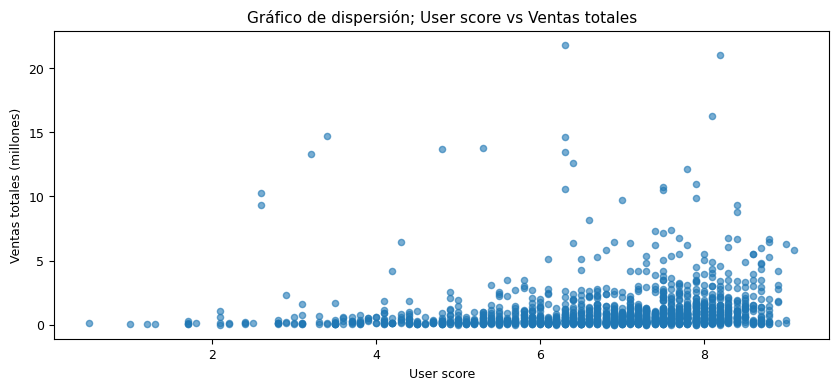

In [21]:
sales_vs_user_score = sales_vs_scores.dropna(subset=['critic_score', 'user_score', 'total_sales'])
sales_vs_user_score.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.6, figsize=(10,4))
plt.title('Gráfico de dispersión; User score vs Ventas totales', fontsize=11)
plt.xlabel('User score', fontsize=9)
plt.ylabel('Ventas totales (millones)', fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
print('Coeficiente de correlación:', sales_vs_user_score['user_score'].corr(sales_vs_user_score['total_sales']))

**¿Qué se puede concluír del resultado anterior?**

**Respuesta:** Las críticas de los profesionales (critic_score) demuestran una correlación que aunque es baja (de 0.405), se puede inferir que estas críticas si tienen ligera influencia en las ventas. Por otro lado, las críticas de los usuarios (user_score) demuestra una correlación bastante baja (de 0.125), por lo que podemos decir que estas críticas no incluyen en las ventas.

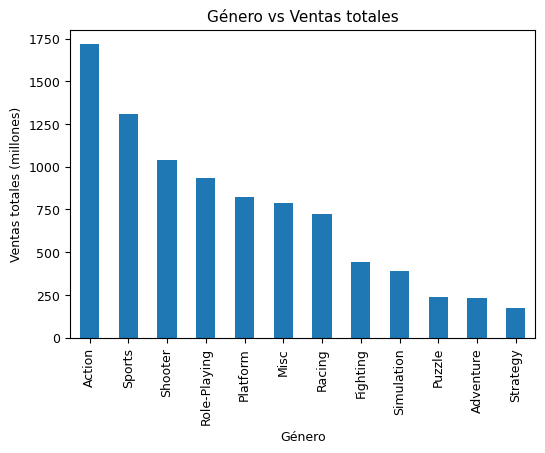

In [22]:
# Realiza una distribución general de los juegos por género.
sales_by_genre = games_release_clean.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
sales_by_genre.plot(kind='bar', figsize=(6,4))
plt.title('Género vs Ventas totales', fontsize=11)
plt.xlabel('Género', fontsize=9)
plt.ylabel('Ventas totales (millones)', fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

**¿Qué se puede decir de los géneros más rentables?**

**Respuesta:** Los 3 géneros más rentables son Acción, Deportes y Shooters.

**¿Puedes generalizar acerca de los géneros con ventas altas y bajas?**

**Respuesta:** Los géneros con ventas altas son aquellos en los que se realizan las mismas acciones de manera repetitiva, respuestas rápidas o inmediatas. Los géneros que representan un mayor reto estratégico, pensamiento crítico, desarrollo, etc., son los que representan menores ventas.

## Paso 4. Crea un perfil de usuario para cada región

#### Para cada región (NA, UE, JP) determina:

In [23]:
# Las cinco plataformas principales.
platform_sales = games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
top5_na_platforms = platform_sales.sort_values(by='na_sales', ascending=False)['na_sales'].head(5)
top5_eu_platforms = platform_sales.sort_values(by='eu_sales', ascending=False)['eu_sales'].head(5)
top5_jp_platforms = platform_sales.sort_values(by='jp_sales', ascending=False)['jp_sales'].head(5)
print('Las cinco plataformas principales para la región NA son:')
print()
print(top5_na_platforms)
print()
print('Las cinco plataformas principales para la región EU son:')
print()
print(top5_eu_platforms)
print()
print('Las cinco plataformas principales para la región JP son:')
print()
print(top5_jp_platforms)

Las cinco plataformas principales para la región NA son:

platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Las cinco plataformas principales para la región EU son:

platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Las cinco plataformas principales para la región JP son:

platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


**Describe las variaciones en sus cuotas de mercado de una región a otra.**

**Respuesta:** Las principales plataformas y las ventas totales cambian entre las regiones. La región con mayores ventas es Norte América (NA), después Europa (EU) y finalmente Japón (JP). Con respecto a las cinco principales plataformas para cada región:
- Norte América (NA): X360, PS2, Wii, PS3 y DS
- Europa (EU): PS2, PS3, X360, Wii y PS
- Japón (JP): DS, PS, PS2, SNES, 3DS

In [24]:
# Los cinco géneros principales.
platform_sales = games.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
top5_na_genres = platform_sales.sort_values(by='na_sales', ascending=False)['na_sales'].head(5)
top5_eu_genres = platform_sales.sort_values(by='eu_sales', ascending=False)['eu_sales'].head(5)
top5_jp_genres = platform_sales.sort_values(by='jp_sales', ascending=False)['jp_sales'].head(5)
print('Los cinco géneros principales para la región NA son:')
print()
print(top5_na_genres)
print()
print('Los cinco géneros principales para la región EU son:')
print()
print(top5_eu_genres)
print()
print('Los cinco géneros principales para la región JP son:')
print()
print(top5_jp_genres)

Los cinco géneros principales para la región NA son:

genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Los cinco géneros principales para la región EU son:

genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Los cinco géneros principales para la región JP son:

genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


**Explica la diferencias.**

**Respuesta**: Los cinco principales géneros para cada región son:

- Norte América (NA): Acción, Deportes, Shooters, Platform y Misc
- Europa (EU): Acción, Deportes, Shooters, Racing y Misc
- Japón (JP): Juegos de rol, Acción, Deportes, Plataforma y Misc
Podemos observar que para las regiones NA y EU las mayores ventas son generadas por el mismo top 3. Sin embargo, en Japón generan más ventas los Juegos de Rol casi por más del doble que las dos siguientes categorías de Acción y Deportes.

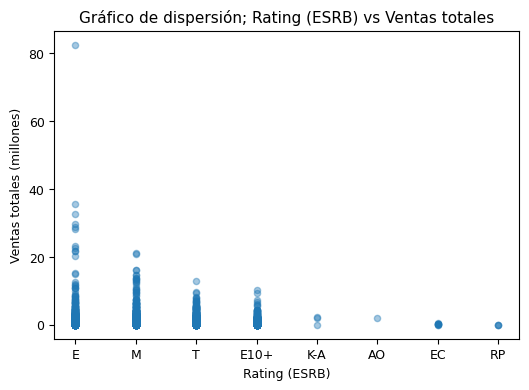

In [25]:
# Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.
games_rating_clean = games[games['rating'] != 'Missing']
sales_vs_rating = games_rating_clean.dropna(subset=['rating', 'total_sales'])
sales_vs_rating.plot(x='rating', y='total_sales', kind='scatter', alpha=0.4, figsize=(6,4))
plt.title('Gráfico de dispersión; Rating (ESRB) vs Ventas totales', fontsize=11)
plt.xlabel('Rating (ESRB)', fontsize=9)
plt.ylabel('Ventas totales (millones)', fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

**Clasificación ESRB (rating) vs Ventas totales**

La principal categoría que genera mayores ventas es Everyone (E), seguida de Mature (M), en tercer lugar Teen (T) y depues Everyone+10 (E+10). De modo que podemos decir que la clasificaciónn ESRB si afecta en las ventas de videojuegos.

## Paso 5. Prueba de hipótesis.

In [30]:
# Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
user_scores_xboxone = games[games['platform'] == 'XOne']['user_score'].dropna()
user_scores_pc = games[games['platform'] == 'PC']['user_score'].dropna()
alpha = 0.05
results = st.ttest_ind(user_scores_xboxone, user_scores_pc, equal_var=True)
print(f"Valor p: {results.pvalue:.6f}")
if results.pvalue < alpha:
    print(f"El valor p ({results.pvalue:.6f}) es menor que alfa ({alpha}), rechazamos la hipótesis nula.")
    print("Conclusión: Existe una diferencia estadísticamente significativa en las calificaciones promedio de los usuarios entre Xbox One y PC (asumiendo varianzas iguales).")
else:
    print("El valor p es mayor o igual que alfa, no rechazamos la hipótesis nula.")
    print("Conclusión: No hay suficiente evidencia estadística para afirmar que existe una diferencia significativa en las calificaciones promedio de los usuarios entre Xbox One y PC (asumiendo varianzas iguales).")

Valor p: 0.000014
El valor p (0.000014) es menor que alfa (0.05), rechazamos la hipótesis nula.
Conclusión: Existe una diferencia estadísticamente significativa en las calificaciones promedio de los usuarios entre Xbox One y PC (asumiendo varianzas iguales).


In [31]:
# Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
user_scores_action = games[games['genre'] == 'Action']['user_score'].dropna()
user_scores_sports = games[games['genre'] == 'Sports']['user_score'].dropna()
alpha = 0.05
results_genre = st.ttest_ind(user_scores_action, user_scores_sports, equal_var=False)
print(f"Valor p: {results_genre.pvalue:.3f}")
if results_genre.pvalue < alpha:
    print(f"El valor p ({results_genre.pvalue:.3f}) es menor que alfa ({alpha}), rechazamos la hipótesis nula.")
    print("Conclusión: Existe una diferencia estadísticamente significativa en las calificaciones promedio de los usuarios entre los géneros Acción y Deportes.")
else:
    print(f"El valor p ({results_genre.pvalue:.3f}) es mayor o igual que alfa ({alpha}), no rechazamos la hipótesis nula.")
    print("Conclusión: No hay suficiente evidencia estadística para afirmar que existe una diferencia significativa en las calificaciones promedio de los usuarios entre los géneros Acción y Deportes.")

Valor p: 0.115
El valor p (0.115) es mayor o igual que alfa (0.05), no rechazamos la hipótesis nula.
Conclusión: No hay suficiente evidencia estadística para afirmar que existe una diferencia significativa en las calificaciones promedio de los usuarios entre los géneros Acción y Deportes.


**¿Cómo formulaste las hipótesis nula y alternativa?**

**Respuesta:**
- Hipótesis nulas: Las medias muestrales son iguales.
- Hipótesis alternativas: Las medias muestrales son distintas.

**Qué criterio utilizaste para probar las hipótesis y por qué.**

**Respuesta:** En ambos casos utilicé prueba de t student con alpha = 0.05. En la primera prueba de hipótesis para determinar si las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas indiqué el parámetro equal_var = True.

En la segunda prueba de hipótesis para determinar si las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes indiqué el parámetro equal_var = False.

## Paso 6. Escribe una conclusión general

De acuerdo con el análisis de datos y las conclusiones individuales que hemos visto, una buena campaña para el próximo año sería apostar por las plataformas de PS3 y X360 en juegos con rating ESRB E, M y T. Para las regiones de Norte América y Europa apostar por géneros de acción, deportes y shooters, mientras que para la región de Japón apostar por juegos de rol y acción.

Sin embargo, se deberá voltear a ver a las nuevas plataformas que se encuentren por salir al mercado, dado que como se observó, aunque estas dos plataformas son las más recientes, sus ciclos de vida están por llegar a su fin y dejarán de ser rentables en el próximo año.